In [1]:
import qutip, pickle, sys
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import time as time
import math, cmath

import projected_evolution_dynamics as me
import matrix_analysis_lib as mat_ansys
import spin_representations as su2
import evs_visualization_tools as evs_visz_tools

from IPython.display import display, Math, Latex
np.set_printoptions(threshold=1.e-9,linewidth=120,precision=3, suppress=True, formatter={"float":lambda x: str(.001*int(1000*x))})

In [5]:
N=6; chain_type = "XYZ"; k_B = 1; temp = 2e-1; temp_ref = 2e-1

### Construcción de los operadores
spin_ops_list = su2.one_body_spin_ops(N)
identity_op = spin_ops_list[0][0]
ts = np.linspace(0, 10.,500)  

### Heisenberg Hamiltonian
Hamiltonian_paras = [.2, .15, .1, 1.]
H_H = su2.Heisenberg_Hamiltonian(op_list = spin_ops_list, chain_type = chain_type,
                                size = N, Hamiltonian_paras = Hamiltonian_paras,
                                closed_bcs = True, visualization = False)

### classical operators 

cl_ops, label_ops = su2.classical_ops(H_H, N, spin_ops_list, False)
magnetization = sum(spin_ops_list[3][a] for a in range(len(spin_ops_list[3])))
neel_operator = sum((-1)**a * spin_ops_list[3][a] for a in range(len(spin_ops_list[3])))

cl_ops["magnetization"] = magnetization; label_ops.append("magnetization")
cl_ops["neel_op"] = neel_operator; label_ops.append("neel_op")
print("Are all the operators Hermitian?:", mat_ansys.basis_hermitian_check(cl_ops))

Are all the operators Hermitian?: [True, True, True, True, True, True, True, True, True, True]


In [6]:
ts = np.linspace(0, 10.,300)  s

beta_ref = (1/temp_ref)
K_ref = - beta_ref * .5 * spin_ops_list[1][0]
rho_ref = (K_ref).expm()
custom_rho_ref = rho_ref/rho_ref.tr()
assert mat_ansys.is_density_op(custom_rho_ref), "Reference state not a density operator"

range_derived_series_orders = [0, 1, 3, 5, 6]
all_coeff_lists = [[.0, .0, .5] + 
                   [0 for i in range(range_derived_series_orders[k])] for k in range(len(range_derived_series_orders))]

Processing step:  1  and Lie subalgebra of dim  0
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  3
3. rho_ref:  Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.249 0.0 -0.212 0.0]
 [0.0 0.249 0.0 -0.212]
 [-0.212 0.0 0.25 0.0]
 [0.0 -0.212 0.0 0.25]]
The basis is orthonormal and hermitian
3. constructing rho0 from the coeff. list and orth. basis
Processing step:  2  and Lie subalgebra of dim  1
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  4
3. rho_ref:  Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.249 0.0 -0.212 0.0]
 [0.0 0.249 0.0 -0.212]
 [-0.212 0.0 0.25 0.0]
 [0.0 -0.212 0.0 0.25]]
The basis is orthonormal and hermitian
3. constructing rho0 from the coeff. list and orth. basis
Processing step:  3  and Lie subalgebra of dim  3
1. Processing reference state ===>
    ^^##.

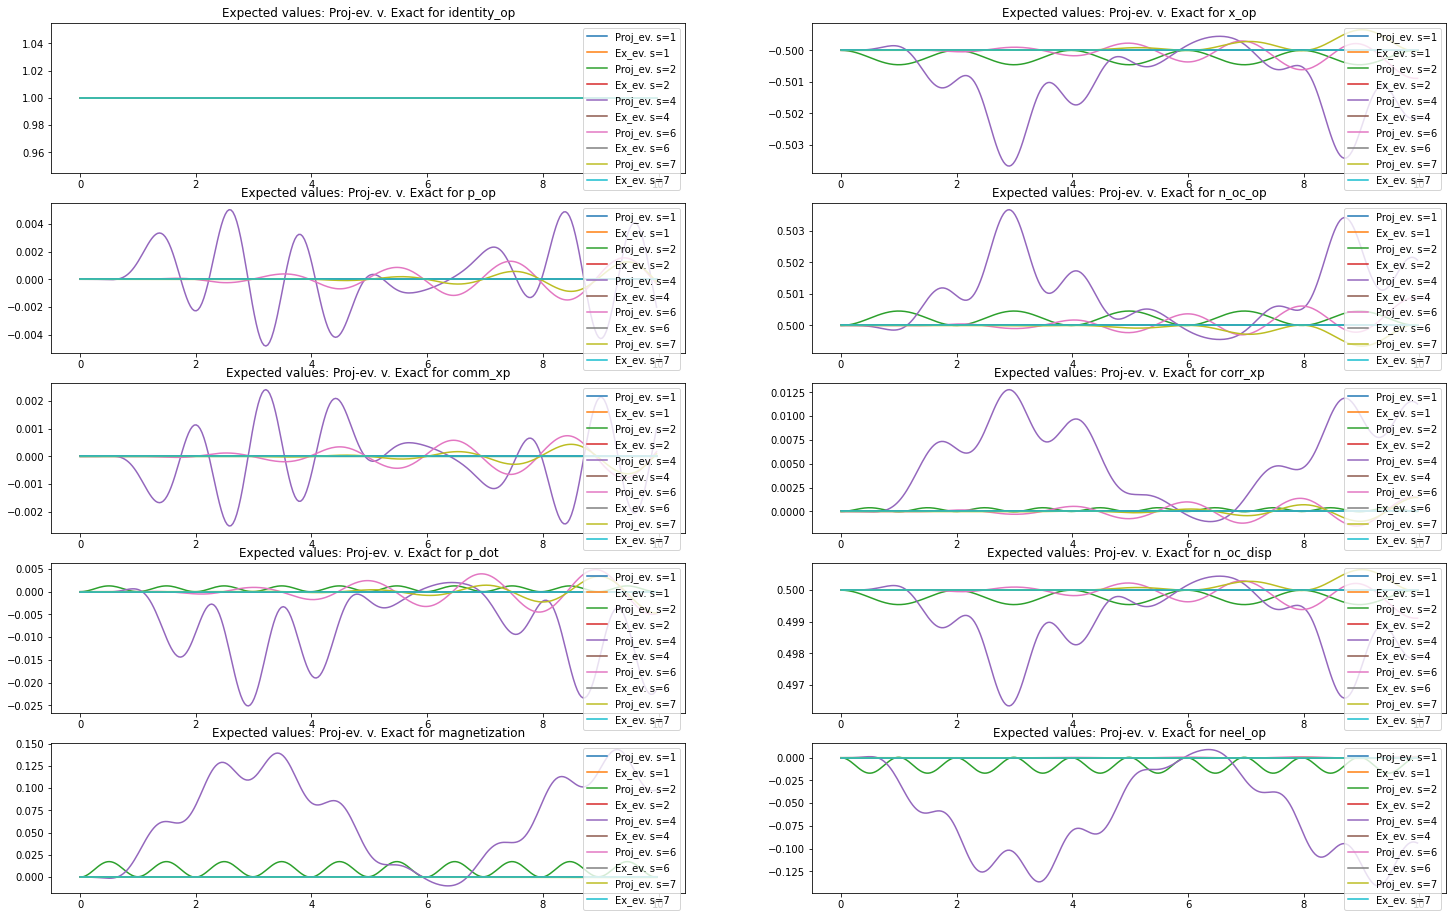

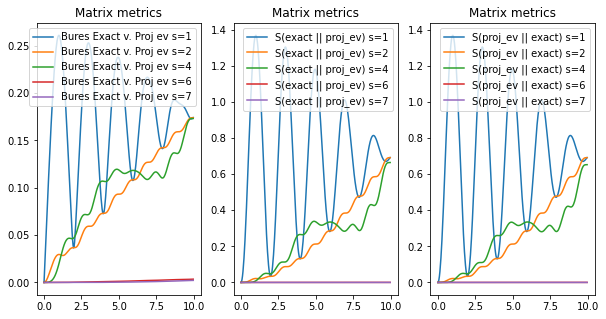

In [18]:
# N = 2
resultados = me.increase_depth_multiple_proj_evs(Hamiltonian = H_H, rho_ref = custom_rho_ref, 
                                              range_derived_series_orders = range_derived_series_orders, 
                                     temp_ref = temp_ref, temp_rho = temp,
                                     generating_operator = spin_ops_list[1][0],
                                     init_coeff_list = all_coeff_lists,
                                     timespan = ts, label_ops = label_ops,
                                     observables = list(cl_ops.values()))

evs_visz_tools.plot_exact_v_proj_ev_avgs_multiple(labels = label_ops,
                         timespan = ts,
                         no_cols_desired = 2,
                         multiple_evolutions = resultados,
                         range_of_temps_or_dims = range_derived_series_orders, plot_N_fixed_temps_not = False,
                                                  plot_var_liesubalg_dim = True
                                                 )
metrics = mat_ansys.exact_v_proj_ev_matrix_metrics_multiple(timespan = ts, range_of_temps_or_dims = range_derived_series_orders,
                                                                  multiple_evolutions = resultados,
                                                                 plot_N_fixed_temps_not = False,
                                                  plot_var_liesubalg_dim = True)

evs_visz_tools.plot_exact_v_proj_ev_metrics_multiple(timespan = ts,
                                                     range_of_temps_or_dims = range_derived_series_orders,
                                                     metric_local = metrics,
                                                    plot_N_fixed_temps_not = False,
                                                  plot_var_liesubalg_dim = True)

Processing step:  1  and Lie subalgebra of dim  0
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  3
3. rho_ref:  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.125 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.125 0.0 ... -0.106 0.0 0.0]
 [0.0 0.0 0.125 ... 0.0 -0.106 0.0]
 ...
 [0.0 -0.106 0.0 ... 0.125 0.0 0.0]
 [0.0 0.0 -0.106 ... 0.0 0.125 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.125]]
The basis is orthonormal and hermitian
3. constructing rho0 from the coeff. list and orth. basis
Processing step:  2  and Lie subalgebra of dim  1
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  4
3. rho_ref:  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.125 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.125 0.0 ... -0.106 0.0 0.0]
 [0.0 0.0 0.125 ... 0.0 -0.106 0.0]
 ...
 [0.0 -0.106 0.0 ... 0.125 0.0 0.0]
 [0.0 0

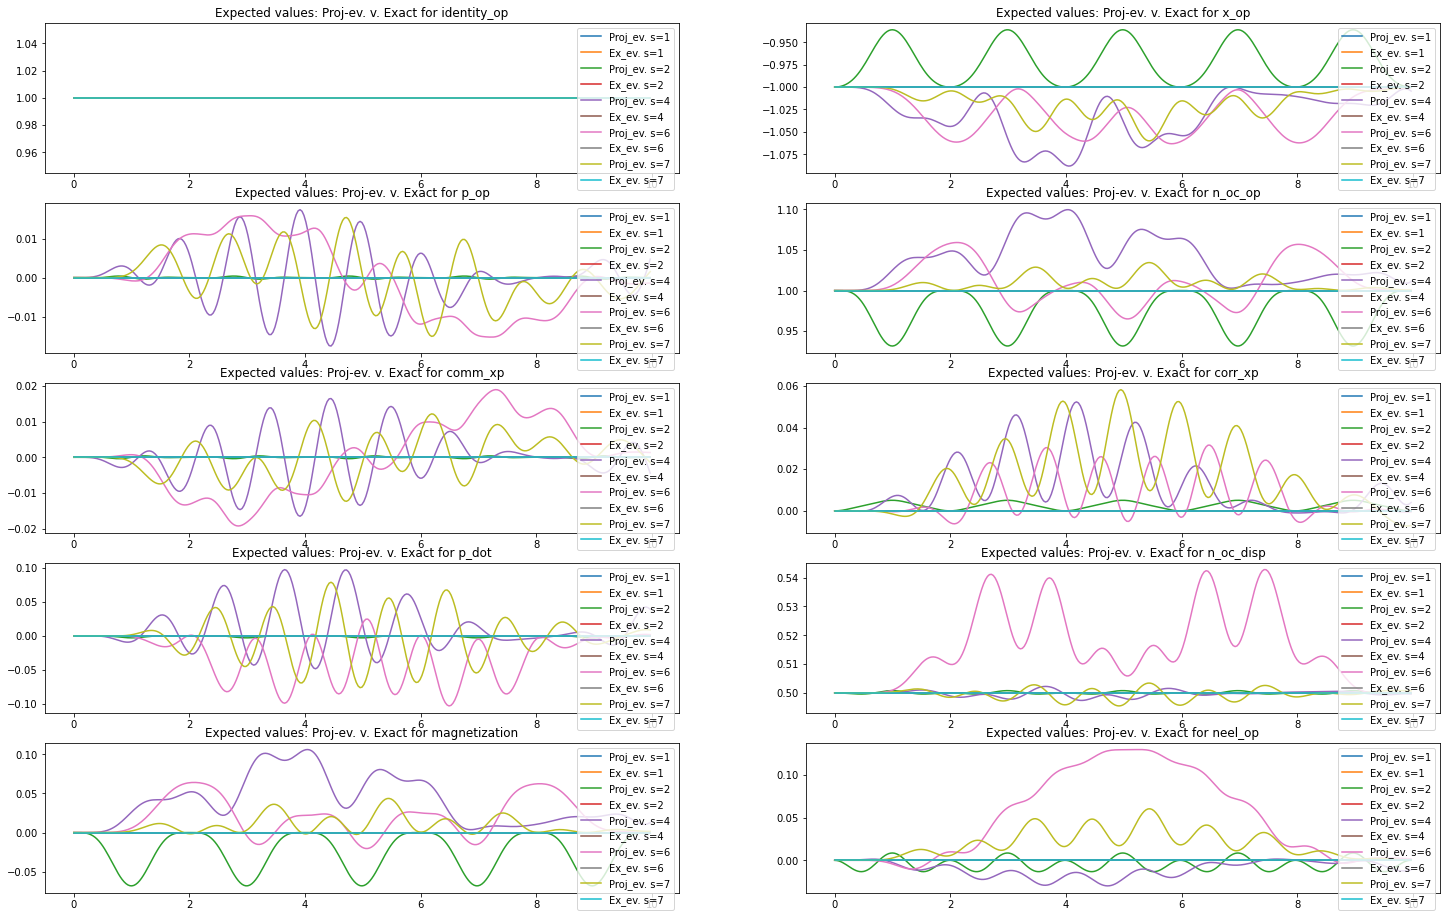

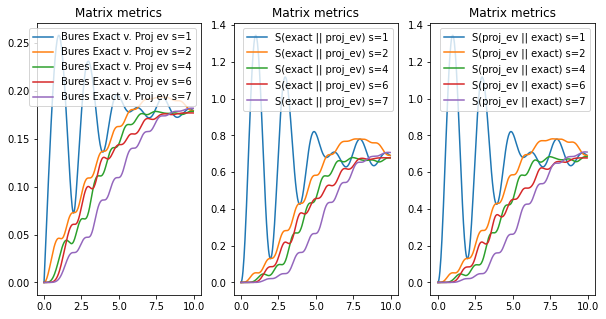

In [4]:
# N = 3
resultados = me.increase_depth_multiple_proj_evs(Hamiltonian = H_H, rho_ref = custom_rho_ref, 
                                              range_derived_series_orders = range_derived_series_orders, 
                                     temp_ref = temp_ref, temp_rho = temp,
                                     generating_operator = spin_ops_list[1][0],
                                     init_coeff_list = all_coeff_lists,
                                     timespan = ts, label_ops = label_ops,
                                     observables = list(cl_ops.values()))

evs_visz_tools.plot_exact_v_proj_ev_avgs_multiple(labels = label_ops,
                         timespan = ts,
                         no_cols_desired = 2,
                         multiple_evolutions = resultados,
                         range_of_temps_or_dims = range_derived_series_orders, plot_N_fixed_temps_not = False,
                                                  plot_var_liesubalg_dim = True
                                                 )
metrics = mat_ansys.exact_v_proj_ev_matrix_metrics_multiple(timespan = ts, range_of_temps_or_dims = range_derived_series_orders,
                                                                  multiple_evolutions = resultados,
                                                                 plot_N_fixed_temps_not = False,
                                                  plot_var_liesubalg_dim = True)

evs_visz_tools.plot_exact_v_proj_ev_metrics_multiple(timespan = ts,
                                                     range_of_temps_or_dims = range_derived_series_orders,
                                                     metric_local = metrics,
                                                    plot_N_fixed_temps_not = False,
                                                  plot_var_liesubalg_dim = True)

Processing step:  1  and Lie subalgebra of dim  0
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  3
3. rho_ref:  Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0.015 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.015 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.015 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.015 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.015 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.015]]
The basis is orthonormal and hermitian
3. constructing rho0 from the coeff. list and orth. basis
Processing step:  2  and Lie subalgebra of dim  1
1. Processing reference state ===>
    ^^##. custom reference state chosen
2. using a base of size  4
3. rho_ref:  Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0.015 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.015 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.015 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0

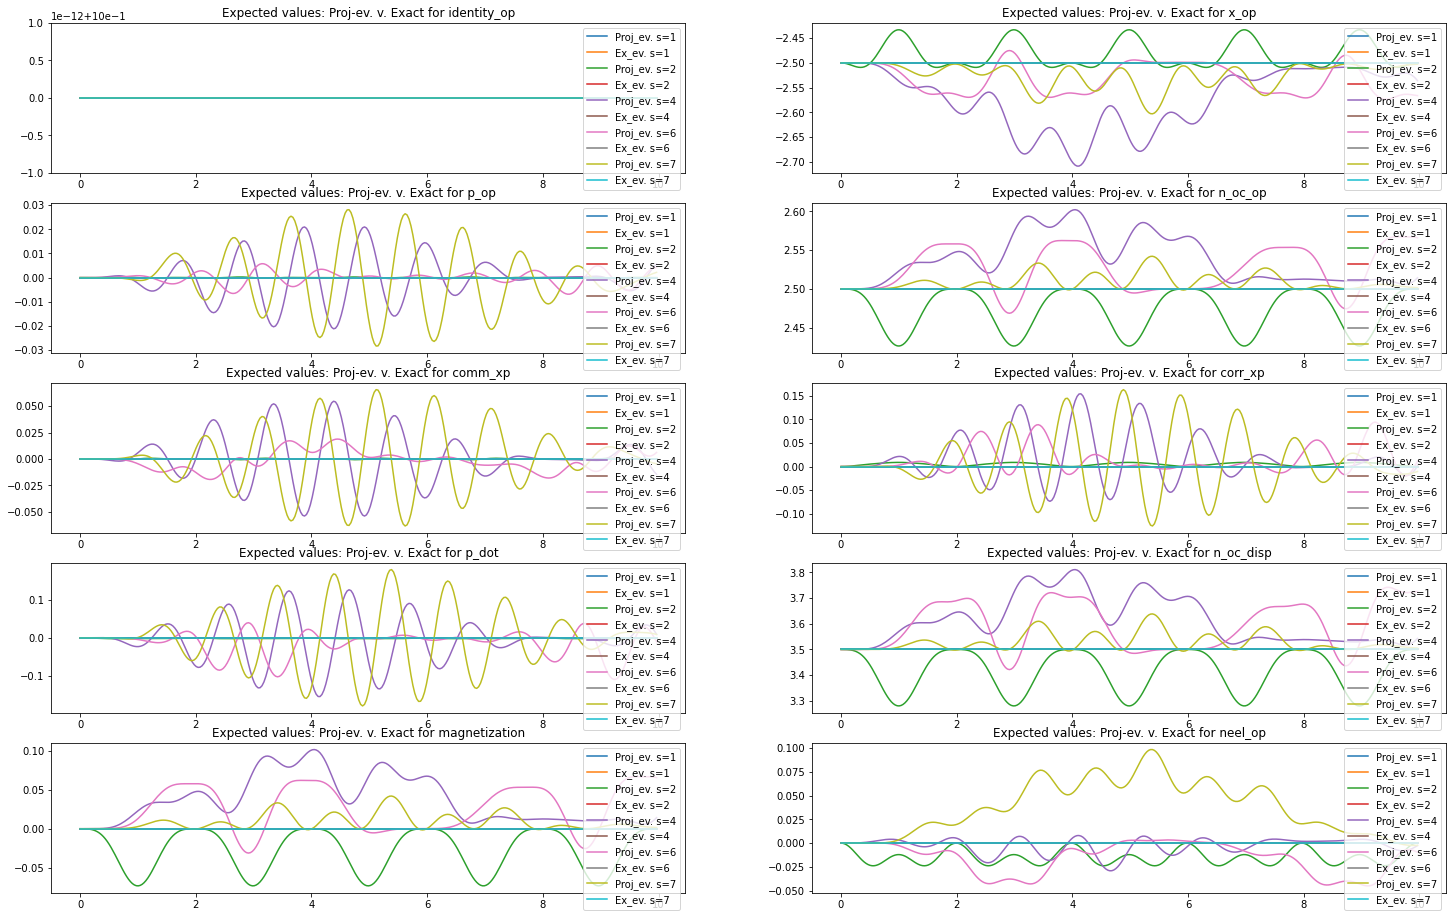

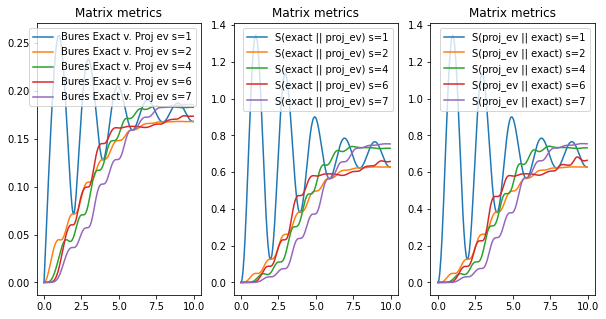

In [7]:
# N = 6
resultados = me.increase_depth_multiple_proj_evs(Hamiltonian = H_H, rho_ref = custom_rho_ref, 
                                              range_derived_series_orders = range_derived_series_orders, 
                                     temp_ref = temp_ref, temp_rho = temp,
                                     generating_operator = spin_ops_list[1][0],
                                     init_coeff_list = all_coeff_lists,
                                     timespan = ts, label_ops = label_ops,
                                     observables = list(cl_ops.values()))

evs_visz_tools.plot_exact_v_proj_ev_avgs_multiple(labels = label_ops,
                         timespan = ts,
                         no_cols_desired = 2,
                         multiple_evolutions = resultados,
                         range_of_temps_or_dims = range_derived_series_orders, plot_N_fixed_temps_not = False,
                                                  plot_var_liesubalg_dim = True
                                                 )
metrics = mat_ansys.exact_v_proj_ev_matrix_metrics_multiple(timespan = ts, range_of_temps_or_dims = range_derived_series_orders,
                                                                  multiple_evolutions = resultados,
                                                                 plot_N_fixed_temps_not = False,
                                                  plot_var_liesubalg_dim = True)

evs_visz_tools.plot_exact_v_proj_ev_metrics_multiple(timespan = ts,
                                                     range_of_temps_or_dims = range_derived_series_orders,
                                                     metric_local = metrics,
                                                    plot_N_fixed_temps_not = False,
                                                  plot_var_liesubalg_dim = True)